<a href="https://colab.research.google.com/github/praneeth6124/Credit_risk_scoring_system/blob/main/credit_risk_scoring_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initial Dependencies

In [ ]:
import pandas as pd
import numpy as np
import kagglehub
import os

In [ ]:
# Download latest version
path = kagglehub.dataset_download("uciml/default-of-credit-card-clients-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'default-of-credit-card-clients-dataset' dataset.
Path to dataset files: /kaggle/input/default-of-credit-card-clients-dataset


In [ ]:
print("Dataset folder:", path)
print("Files inside dataset folder:")
print(os.listdir(path))

Dataset folder: /kaggle/input/default-of-credit-card-clients-dataset
Files inside dataset folder:
['UCI_Credit_Card.csv']


In [ ]:
csv_path = os.path.join(path, "UCI_Credit_Card.csv")
df = pd.read_csv(csv_path)

print("Shape:", df.shape)
print("Columns:", len(df.columns))
df.head()

Shape: (30000, 25)
Columns: 25


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
# STEP 3: drop ID + define target and features

target_col = "default.payment.next.month"

df = df.drop(columns=["ID"], errors="ignore")

X = df.drop(columns=[target_col])
y = df[target_col].astype(int)

print("X shape:", X.shape)
print("y shape:", y.shape)

print("Target distribution:")
print(y.value_counts())

print("Default rate (%):")
print((y.value_counts(normalize=True) * 100).round(2))


X shape: (30000, 23)
y shape: (30000,)
Target distribution:
default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64
Default rate (%):
default.payment.next.month
0    77.88
1    22.12
Name: proportion, dtype: float64


# Train-Test-Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

print("Train default rate (%):", round(y_train.mean() * 100, 2))
print("Test default rate (%):", round(y_test.mean() * 100, 2))


Train shape: (24000, 23) (24000,)
Test shape: (6000, 23) (6000,)
Train default rate (%): 22.12
Test default rate (%): 22.12


In [ ]:
X.columns.tolist()

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
pay_cols  = ["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]
bill_cols = ["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"]
amt_cols  = ["PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]

# Feature Engineering

In [ ]:
def feature_engineering(df):
    df = df.copy()

    df["late_months_count"] = (df[pay_cols] > 0).sum(axis=1)
    df["max_delay"] = df[pay_cols].max(axis=1)

    df["bill_mean_6m"] = df[bill_cols].mean(axis=1)
    df["pay_mean_6m"]  = df[amt_cols].mean(axis=1)

    df["util_mean_6m"] = df["bill_mean_6m"] / (df["LIMIT_BAL"] + 1)
    df["pay_to_bill_mean_6m"] = df["pay_mean_6m"] / (df["bill_mean_6m"] + 1)

    return df

In [ ]:
X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)

print("train before:", X_train.shape, "after:", X_train_fe.shape)
print("test before:", X_test.shape, "after:", X_test_fe.shape)


train before: (24000, 23) after: (24000, 29)
test before: (6000, 23) after: (6000, 29)


# Baseline Model

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, average_precision_score, confusion_matrix, classification_report

# Baseline pipeline (scaling + logistic regression)
baseline_model = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(
        max_iter=2000,
        class_weight="balanced",
        random_state=42
    ))
])

# Train
baseline_model.fit(X_train_fe, y_train)

# Predict probabilities
y_test_proba = baseline_model.predict_proba(X_test_fe)[:, 1]

# Metrics
roc = roc_auc_score(y_test, y_test_proba)
pr_auc = average_precision_score(y_test, y_test_proba)

print("Baseline Logistic Regression Results")
print("ROC-AUC:", round(roc, 4))
print("PR-AUC :", round(pr_auc, 4))

# Default threshold = 0.5
y_test_pred = (y_test_proba >= 0.50).astype(int)

print("Confusion Matrix (threshold=0.50)")
print(confusion_matrix(y_test, y_test_pred))

print("Classification Report (threshold=0.50)")
print(classification_report(y_test, y_test_pred, digits=4))

Baseline Logistic Regression Results
ROC-AUC: 0.7449
PR-AUC : 0.4978
Confusion Matrix (threshold=0.50)
[[3667 1006]
 [ 528  799]]
Classification Report (threshold=0.50)
              precision    recall  f1-score   support

           0     0.8741    0.7847    0.8270      4673
           1     0.4427    0.6021    0.5102      1327

    accuracy                         0.7443      6000
   macro avg     0.6584    0.6934    0.6686      6000
weighted avg     0.7787    0.7443    0.7570      6000



# LightGBM Model

In [ ]:
#!pip -q install lightgbm

from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, average_precision_score, confusion_matrix

lgbm_model = LGBMClassifier(
    n_estimators=1000,
    learning_rate=0.03,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    class_weight="balanced"
)

# Training with early stopping
lgbm_model.fit(
    X_train_fe, y_train,
    eval_set=[(X_test_fe, y_test)],
    eval_metric="auc",
    callbacks=[],
)

# Predict probabilities
y_test_proba_lgbm = lgbm_model.predict_proba(X_test_fe)[:, 1]

# Metrics
roc_lgbm = roc_auc_score(y_test, y_test_proba_lgbm)
pr_auc_lgbm = average_precision_score(y_test, y_test_proba_lgbm)

print("LightGBM results")
print("ROC-AUC:", round(roc_lgbm, 4))
print("PR-AUC :", round(pr_auc_lgbm, 4))

# Confusion matrix at threshold 0.5
y_test_pred_lgbm = (y_test_proba_lgbm >= 0.50).astype(int)

print("Confusion Matrix (threshold=0.50)")
print(confusion_matrix(y_test, y_test_pred_lgbm))

[LightGBM] [Info] Number of positive: 5309, number of negative: 18691
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008917 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4302
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
LightGBM results
ROC-AUC: 0.7716
PR-AUC : 0.5508
Confusion Matrix (threshold=0.50)
[[3832  841]
 [ 535  792]]


In [ ]:
proba = y_test_proba_lgbm  # LightGBM probabilities on test set

# Initial thresholds (tuning)
t1 = 0.25     # approve below this
t2 = 0.80     # reject above this

decisions = np.where(
    proba < t1, "APPROVE",
    np.where(proba < t2, "REVIEW", "REJECT")
)

decision_counts = pd.Series(decisions).value_counts()

print("Decision distribution (test set):")
print(decision_counts)

print("Decision distribution (%):")
print((decision_counts / len(decisions) * 100).round(2))


Decision distribution (test set):
REVIEW     2992
APPROVE    2473
REJECT      535
Name: count, dtype: int64
Decision distribution (%):
REVIEW     49.87
APPROVE    41.22
REJECT      8.92
Name: count, dtype: float64


In [ ]:
valid_results = pd.DataFrame({
    "y_true": y_test.values,
    "p_default": y_test_proba_lgbm,
    "decision": decisions
})

bucket_summary = valid_results.groupby("decision").agg(
    count=("y_true", "size"),
    default_rate=("y_true", "mean"),
)

bucket_summary["default_rate_%"] = (bucket_summary["default_rate"] * 100).round(2)
bucket_summary = bucket_summary.sort_values("default_rate")

print("Default rate inside each decision bucket:")
display(bucket_summary[["count", "default_rate_%"]])


Default rate inside each decision bucket:


,count,default_rate_%
decision,,
APPROVE,2473,8.65
REVIEW,2992,24.53
REJECT,535,70.84


In [ ]:
T1_APPROVE = t1
T2_REJECT = t2

def credit_decision(p_default, t1=T1_APPROVE, t2=T2_REJECT):
    if p_default < t1:
        return "APPROVE"
    elif p_default >= t2:
        return "REJECT"
    else:
        return "REVIEW"

# Testing on a few samples
for p in [0.03, 0.10, 0.30,0.60 ,0.80,0.90]:
    print(p, "->", credit_decision(p))


0.03 -> APPROVE
0.1 -> APPROVE
0.3 -> REVIEW
0.6 -> REVIEW
0.8 -> REJECT
0.9 -> REJECT


# SHAP Explainability

In [ ]:
# !pip -q install shap

import shap

explainer = shap.TreeExplainer(lgbm_model)

In [ ]:
# Computing SHAP values
shap_values = explainer.shap_values(X_test_fe)

# Fix LightGBM binary output
if isinstance(shap_values, list):
    shap_values = shap_values[1]   # class 1 = default

/usr/local/lib/python3.12/dist-packages/shap/explainers/_tree.py:587: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


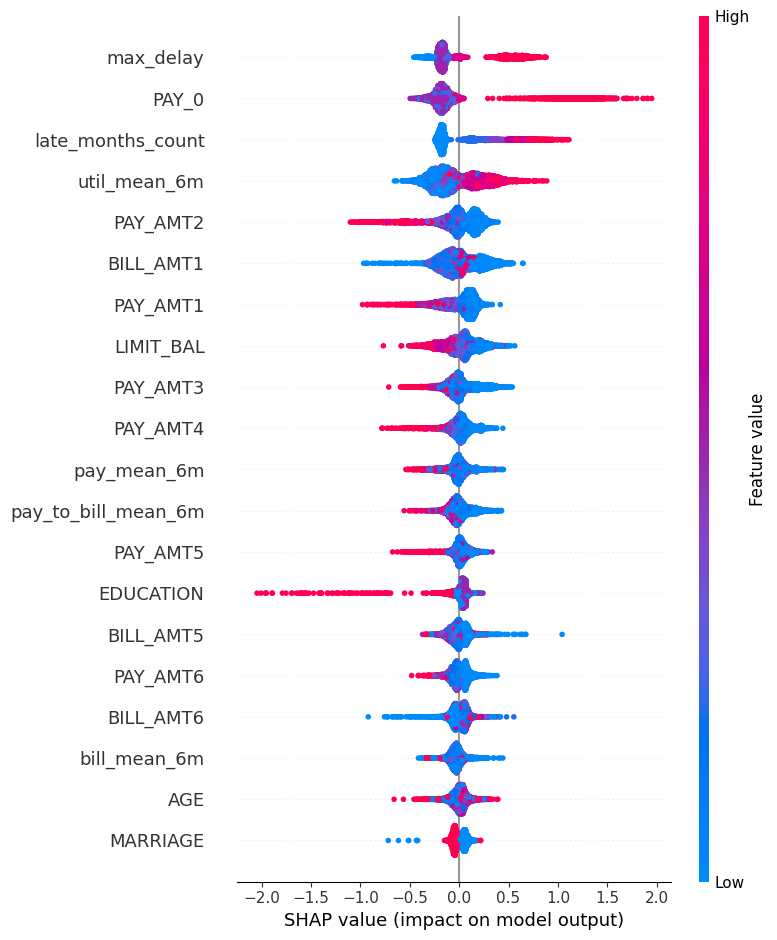

In [ ]:
shap.summary_plot(shap_values, X_test_fe)

In [ ]:
# Picking one customer
idx = 0

row = X_test_fe.iloc[[idx]]

# Model prediction
p_default = lgbm_model.predict_proba(row)[0,1]
decision = credit_decision(p_default)

print(f"Default probability: {p_default:.3f}")
print("Decision:", decision)


# SHAP values for that customer
sv = explainer.shap_values(row)

# LightGBM fix
if isinstance(sv, list):
    sv = sv[1]

shap_row = sv[0]


# explanation table
explain_df = pd.DataFrame({
    "feature": X_test_fe.columns,
    "value": row.values[0],
    "shap_impact": shap_row
})

# Sorting by strongest impact
top_reasons = explain_df.reindex(
    explain_df.shap_impact.abs().sort_values(ascending=False).index
).head(5)

print("Top reasons for this decision:")
display(top_reasons)

Default probability: 0.248
Decision: APPROVE
Top reasons for this decision:


/usr/local/lib/python3.12/dist-packages/shap/explainers/_tree.py:587: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


,feature,value,shap_impact
11,BILL_AMT1,1540.000000,0.267258
17,PAY_AMT1,26060.000000,-0.215976
27,util_mean_6m,0.121111,-0.172567
23,late_months_count,0.000000,-0.164192
5,PAY_0,-1.000000,-0.147789


### positive SHAP - pushes toward default (risk)
### negative SHAP - pushes toward non-default (safe)

In [ ]:
import joblib

artifacts = {
    "model": lgbm_model,
    "t1": t1,
    "t2": t2,
    "features": X_train_fe.columns.tolist()
}

joblib.dump(artifacts, "credit_risk_model.pkl")

print("Model saved successfully")

Model saved successfully


In [ ]:
!pip freeze > requirements_full.txt

In [ ]:
from google.colab import files
files.download("credit_risk_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download("requirements_full.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!ls

credit_risk_model.pkl  requirements_full.txt  sample_data


In [ ]:
!python --version

Python 3.12.12
